# Markov Chain Monte Carlo
## Metropolis-Hastings

This notebook walks through how to implement a simple markov chain monte carlo analysis using the ubiquitious Metropolis Hastings algorithm.

MCMC analysis searches some N-Dimensional space for some mode of a distribution. The process is as follows:

1) Choose Random Start theta

2) At step $i = 1,..,N$, propose a new parameter say, $\theta_{p}$, which is drawn from some distribution with a mean $\theta_i$, and covariance matrix $\Sigma$. 

3) Evaluate the ratio: $$r = \frac{P(\theta_p | y)}{P(\theta_i | y)}$$

4) Accept $\theta_p$ with some probability.

5) Repeat steps 2-4 until you converge.

Quick and easy.

In [4]:
import numpy
from scipy.stats import multivariate_normal

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import cm

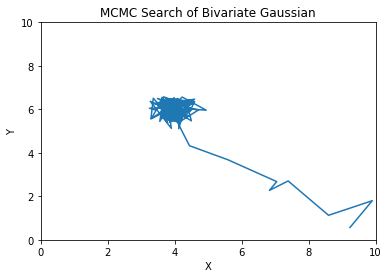

In [7]:
#The distribution we are searching.
Sigma = numpy.asarray([[1,0],[0,1]])/numpy.sqrt(100)
means = numpy.asarray([4,6])

n_mc = 1000 # Length of our markov chain.
tau = 0.1 #Convergence value
markov_chain = numpy.zeros((n_mc,2))
markov_chain[0] = [9.234,0.567] #Random first guess
acceptances = 0

#Proposals

meanp = numpy.asarray([0,0])
covp = numpy.asarray([[1,0],[0,1]])


for i in numpy.arange(n_mc-1):
    
    current_mean = markov_chain[i]
    proposed_mean = current_mean + numpy.random.multivariate_normal(meanp,covp)
    
    pdf_curr = multivariate_normal.pdf(current_mean,means,Sigma)
    pdf_proposed = multivariate_normal.pdf(proposed_mean,means,Sigma)
    ratio = pdf_proposed / pdf_curr
    
    rand = numpy.random.rand()
    
    if ratio > rand:
        markov_chain[i+1] = proposed_mean
        acceptances += 1
    else:
        markov_chain[i+1] = current_mean
        
    
    
#Calculate our acceptance ratio

acceptance_ratio = acceptances / n_mc

fig=plt.figure()
ax = fig.add_subplot(111)

x = markov_chain[:,0]
y = markov_chain[:,1]

line = Line2D(x,y)
ax.add_line(line)
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("MCMC Search of Bivariate Gaussian")
plt.show()